# Python 與機器學習 - 分類問題

## 郭耀仁

## 分類問題

- 我們從 Logistic Regression 羅吉斯回歸開始
- 雖然有回歸兩個字，但其實是個分類器
- 處理二元分類問題
    - Hot dog/Not hot dog
    - 垃圾/非垃圾郵件
    - 詐欺/非詐欺交易

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_arr_1, x_arr_2 = np.arange(1, 6), np.arange(7, 12)
y_arr_1, y_arr_2 = np.zeros(5), np.ones(5)
plt.scatter(np.concatenate([x_arr_1, x_arr_2]), np.concatenate([y_arr_1, y_arr_2]), marker = 'x', color = 'r')
plt.xlabel("Unusual pattern counts")
plt.yticks([0, 0.5, 1], ["No(0)", "Fraud?", "Yes(1)"])
plt.axhline(y = 0.5, c = 'k', ls = ':')
plt.plot([1, 12], [0.1, 1], c = "b", linestyle = "-", alpha = 0.3)

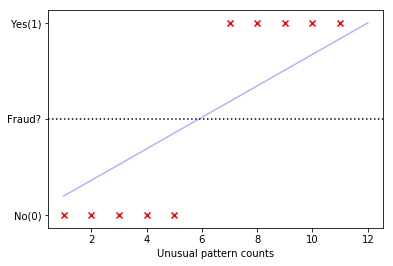

In [2]:
plt.show()

## 分類問題（2）

- 我們需要將 $h(x) = \theta^{T}x$ 輸出的值域轉換至 $0 \leq h(x) \leq 1$
- 利用 $g$ 函數，也就是 sigmoid function

$$g(z) = \frac{1}{1+e^{-z}}$$
$$h(x) = g(\theta^{T}x) = \frac{1}{1 + e^{-\theta^{T}x}}$$

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid_fun(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid_fun(x)
plt.plot(x, y)
plt.axvline(0, color = 'black')
plt.axhline(y = 0, ls = ':', color = 'k', alpha = 0.5)
plt.axhline(y = 0.5, ls = ':', color = 'k', alpha = 0.5)
plt.axhline(y = 1, ls = ':', color = 'k', alpha = 0.5)
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.title("Sigmoid Function")

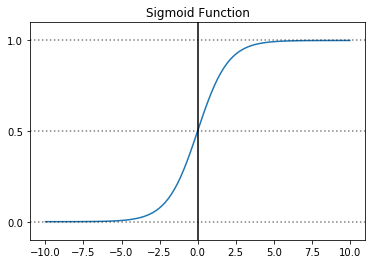

In [4]:
plt.show()

## 分類問題（3）

- 接著我們再做一次轉換，決定 $g(z)$ 輸出的機率該如何轉換至 $\hat{y} \in {\{0, 1\}}$

$$ \hat{y} = H(x) =
  \begin{cases}
    1       & \quad \text{if } x\geq 0.5\\
    0  & \quad \text{otherwise}\\
  \end{cases}
$$

## 分類問題（4）

- 拆解 Logistic 分類器的建立流程：
    - 建立迴歸模型 $h(x) = \theta^Tx$
    - 將 $h$ 的輸出作為 Sigmoid 函數的輸入，得到 $g(\theta^Tx)$
    - 將 $g(\theta^Tx)$ 作為 $H$ 的輸入，得到 $\hat{y}$

## 分類問題（5）

- 假如 $(\theta_0, \theta_1, \theta_2) = (-3, 1, 1)$：

$$\theta = \begin{bmatrix}
    -3 \\ 1 \\ 1
\end{bmatrix}$$

$$h(x) = \theta^{T}x = -3 + x_1 + x_2$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

x1_arr = np.linspace(0, 3, 100)
x_points = np.linspace(0, 3, 20)
x_points_len = int(len(x_points) / 2)
y_minus = np.array(random.choices(np.arange(1, 2, 0.01), k = x_points_len)) - x_points[:x_points_len]
y_plus = np.array(random.choices(np.arange(4, 6, 0.01), k = x_points_len)) - x_points[x_points_len:]
plt.scatter(x_points[:x_points_len], y_minus, marker = '_', s = 200)
plt.scatter(x_points[x_points_len:], y_plus, marker = '+', c = 'r', s = 200)
plt.plot(x1_arr, 3 - x1_arr, c = 'k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Boundary")

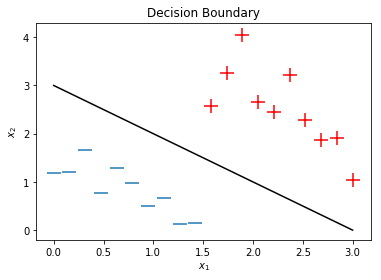

In [6]:
plt.show()

## 分類問題（6）

- 成本函數
- 使用跟迴歸問題不同的成本函數

$$J(h(x), y) =
  \begin{cases}
    -\log(h(x))  & \quad \text{if } y = 1\\
    -\log(1 - h(x))  & \quad \text{if } y = 0\\
  \end{cases}
$$

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.01, 1, 0.01)
y1 = -np.log(x)
y2 = -np.log(1 - x)
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
plt.plot(x, y1)
plt.title("$-\log{h(x)}$")
plt.subplot(1, 2, 2)
plt.plot(x, y2)
plt.title("$-\log{(1-h(x))}$")
plt.tight_layout()

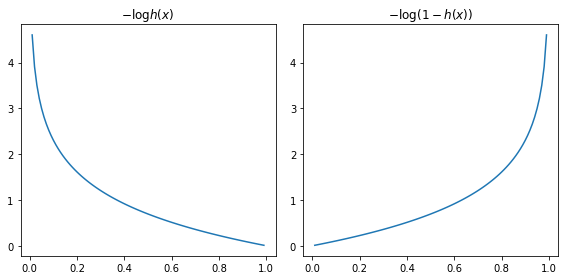

In [8]:
plt.show()

## 分類問題（7）

- 視覺化之後我們可以較清楚暸解 Logistic Regression 的成本函數意涵：
    - 當 y = 1 的時候，如果 $h(x)$ 預測是 0，則成本函數趨近無限大；反之成本函數為 0
    - 當 y = 0 的時候，如果 $h(x)$ 預測是 1，則成本函數趨近無限大；反之成本函數為 0

## 分類問題（8）

- 梯度遞減

$$J(h(x), y) = -y\log(h(x)) - (1-y)\log(1-h(x))$$

$$J(\theta) = -\frac{1}{m}\sum_{i = 1}^{m}[y\log(h(x))+(1-y)\log(1-h(x))]$$

$$\theta_j := \theta_j - \alpha \frac{\mathrm \partial}{\mathrm \partial \theta_j} J(\theta)$$

## 分類問題（9）

- 延伸二元分類到多元分類問題：One-vs-all

$$y \in {\{0, 1, 2\}}$$
$$h^{0}(x) = P(y = 0 \mid x; \theta)$$
$$h^{1}(x) = P(y = 1 \mid x; \theta)$$
$$h^{2}(x) = P(y = 2 \mid x; \theta)$$
$$\text{prediction:}\;\;max(h^{0}(x), h^{1}(x), h^{2}(x))$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x_arr = np.arange(1, 13)
y_arr_length = [3, 4, 5]
random.seed(123)
y_arr_1 = x_arr[:3] + np.array(random.choices(np.arange(10, 15, 0.1), k = y_arr_length[0]))
y_arr_2 = x_arr[3:7] + np.array(random.choices(np.arange(0, 5, 0.1), k = y_arr_length[1]))
y_arr_3 = x_arr[7:] + np.array(random.choices(np.arange(5, 10, 0.1), k = y_arr_length[2]))
plt.scatter(x_arr[:3], y_arr_1, c = 'g', marker = '^', s = 200)
plt.scatter(x_arr[3:7], y_arr_2, c = 'b', marker = 's', s = 200)
plt.scatter(x_arr[7:], y_arr_3, c = 'r', marker = 'x', s = 200)

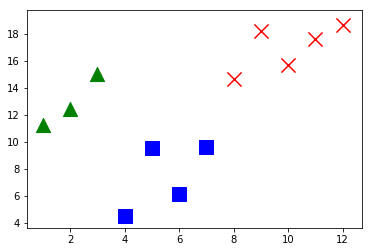

In [10]:
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x_arr = np.arange(1, 13)
y_arr_length = [3, 4, 5]
random.seed(123)
y_arr_1 = x_arr[:3] + np.array(random.choices(np.arange(10, 15, 0.1), k = y_arr_length[0]))
y_arr_2 = x_arr[3:7] + np.array(random.choices(np.arange(0, 5, 0.1), k = y_arr_length[1]))
y_arr_3 = x_arr[7:] + np.array(random.choices(np.arange(5, 10, 0.1), k = y_arr_length[2]))
plt.figure(1, figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(x_arr[:3], y_arr_1, c = 'g', marker = '^', s = 200)
plt.scatter(x_arr[3:], np.concatenate([y_arr_2, y_arr_3]), c = 'k', marker = 'o', s = 200)
plt.plot([2, 5], [2, 18])
plt.subplot(1, 3, 2)
plt.scatter(x_arr[3:7], y_arr_2, c = 'b', marker = 's', s = 200)
plt.scatter(np.concatenate([x_arr[:3], x_arr[7:]]), np.concatenate([y_arr_1, y_arr_3]), c = 'k', marker = 'o', s = 200)
plt.plot([0, 15], [10, 12])
plt.subplot(1, 3, 3)
plt.scatter(x_arr[7:], y_arr_3, c = 'r', marker = 'x', s = 200)
plt.scatter(x_arr[:7], np.concatenate([y_arr_1, y_arr_2]), c = 'k', marker = 'o', s = 200)
plt.plot([5, 10], [20, 3])

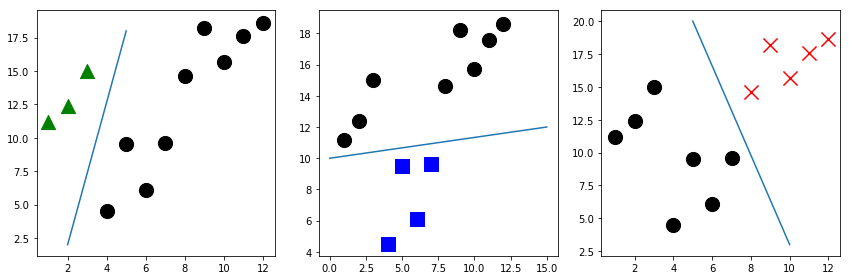

In [12]:
plt.tight_layout()
plt.show()

## 羅吉斯迴歸

- 請 `sklearn` 幫我們找 $\theta_i$

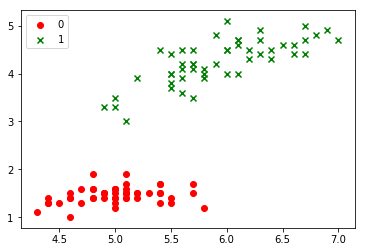

In [13]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
x1_setosa, x2_setosa = X[:50, 0], X[:50, 2]
x1_versicolor, x2_versicolor = X[50:100, 0], X[50:100, 2]

plt.scatter(x = x1_setosa, y = x2_setosa, marker = "o", color = "red", label = "0")
plt.scatter(x = x1_versicolor, y = x2_versicolor, marker = "x", color = "green", label = "1")
plt.legend(loc = "upper left")
plt.show()

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# 決策區域圖
def plot_decision_region(X, y, classifier, resolution = 0.02):
    markers = ('o', 'x', '^')
    colors = ('red', 'green', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                     np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], c = cmap(idx), marker = markers[idx], label = cl)

In [15]:
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data[:100, [0, 2]]
y = iris.target[:100]

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X, y)
plot_decision_region(X, y, classifier = lr)
plt.legend(loc = "upper left")

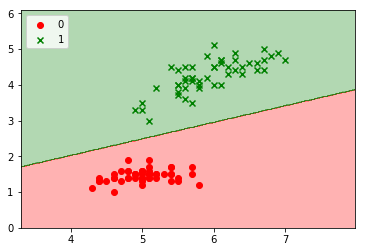

In [16]:
plt.show()

## 感知器學習

- 沒有經過 sigmoid 函數轉換的簡單分類器
- 其中 $\theta_0x_0$ 即為門檻值
- $\phi$ 函數就像是一個簡單版的 sign 函數

$$h(x) = \theta_0x_0 + \theta_1x_1 + ... + \theta_mx_m = \theta^Tx$$


$$
    \hat{y} = \phi(h(x)) =
    \begin{cases}
        1       & \quad \text{if } h(x)\geq 0\\
    0  & \quad \text{ohterwise.}\\
    \end{cases}
$$

## 感知器學習（2）

- 初始一個很小趨近於零的值給 $\theta$
- 利用真實答案 $y_i$ 與預測結果 $\hat{y_i}$ 的誤差更新 $\theta$

$$\theta_i:=\theta_i + \Delta \theta_i$$

$$\Delta \theta_i = \alpha(y_i - \hat{y_i})x_i$$

## 感知器學習（3）

- 正確的預測感知器不會修正權重 $\theta$

$$\Delta \theta_i = \alpha (1 - 1)x_i = 0$$
$$\Delta \theta_i = \alpha (0 - 0)x_i = 0$$

- 錯誤的預測會讓感知器修正權重 $\theta$ 藉此修正下一輪的預測結果

$$\Delta \theta_i = \alpha (1 - 0)x_i = \alpha (1) x_i$$
$$\Delta \theta_i = \alpha (0 - 1)x_i = \alpha (-1) x_i$$

## 感知器學習（4）

- 修正的方向：
    - $\Delta \theta_i = \alpha (1 - 0)x_i = \alpha (1) x_i$：$\theta$ 增大，更容易達成 $h(x) \geq 0$
    - $\Delta \theta_i = \alpha (0 - 1)x_i = \alpha (-1) x_i$：$\theta$ 增大，更容易達成 $h(x) < 0$

$$
    \hat{y} = \phi(h(x)) =
    \begin{cases}
        1       & \quad \text{if } h(x)\geq 0\\
    0  & \quad \text{ohterwise.}\\
    \end{cases}
$$

In [17]:
# 建立一個 Perceptron 類別
import numpy as np

class Perceptron:
    def __init__(self, alpha, n_epoch):
        self.alpha = alpha
        self.n_epoch = n_epoch
        
    def fit(self, X, y):
        self.thetas = np.zeros(1 + X.shape[1]) # 1 給 theta_0, X.shape[1] 給 theta_1~theta_n
        self.errors = []
        
        for i in range(self.n_epoch):
            error = 0
            for x, target in zip(X, y):
                delta_theta = self.alpha * (target - self.predict(x))
                self.thetas[1:] += delta_theta * x
                self.thetas[0] += delta_theta
                error += (delta_theta != 0) # delta_theta 太小，改以 boolean 判斷
            self.errors.append(error)
        return self
    
    def net_input(self, X):
        return np.dot(self.thetas[1:], X.T) + self.thetas[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, 0) # \phi function is applied here

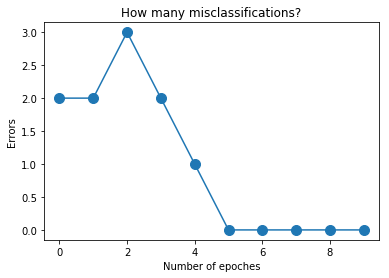

In [18]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:100, [0, 2]]
y = iris.target[:100]
ppn = Perceptron(alpha = 0.01, n_epoch = 10)
ppn.fit(X, y)
plt.plot(np.arange(len(ppn.errors)), ppn.errors, marker = 'o', markersize = 10)
plt.xlabel("Number of epoches")
plt.ylabel("Errors")
plt.title('How many misclassifications?')
plt.show()

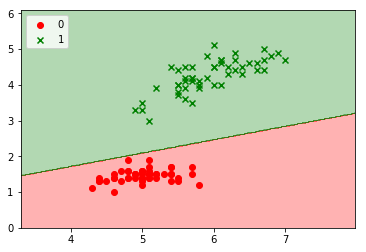

In [19]:
plot_decision_region(X, y, classifier = ppn)
plt.legend(loc = "upper left")
plt.show()

## 線性不可分

- 我們的羅吉斯迴歸與感知器學習用來處理線性可分的資料表現得很不錯
- 但什麼樣的資料這些分類器會分得很差？

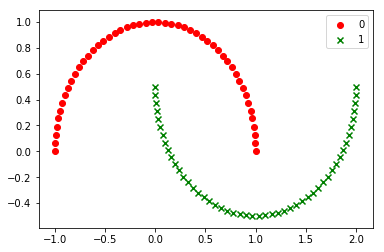

In [20]:
# 像是這樣子的資料：
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples = 100, random_state = 0)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'r', marker = 'o', label = '0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'g', marker = 'x', label = '1')
plt.legend()
plt.show()

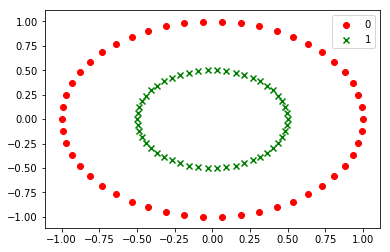

In [21]:
# 或是像這樣子的資料：
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples = 100, random_state = 0, factor = 0.5)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'r', marker = 'o', label = '0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'g', marker = 'x', label = '1')
plt.legend()
plt.show()

## 線性不可分（2）

- 面對線性不可分的資料，我們可以採取：
    - 支持向量機（Support Vector Machine，SVM）
    - 決策樹（Decision Tree）
    - K 最近鄰（K-nearest neighbor，KNN）

## 支持向量機

- 支持向量機，亦稱為最大邊界分類器

$$\text{minimize}C\sum_{i=1}^{m}[ycost_1(\theta^Tx) + (1-y)cost_0(\theta^Tx)] + \frac{1}{2}\sum_{i=1}^{n}\theta_j^2$$

$$C = \frac{1}{\lambda}$$

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def cost_fun_1(x):
    if x < 1:
        return -x + 1
    else:
        return 0
def cost_fun_0(x):
    if x < -1:
        return 0
    else:
        return x + 1
x_arr_1 = np.linspace(-1, 3)
x_arr_2 = np.linspace(-3, 1)
y_arr_1 = list(map(cost_fun_1, x_arr_1))
y_arr_2 = list(map(cost_fun_0, x_arr_2))
plt.subplot(1, 2, 1)
plt.plot(x_arr_1, y_arr_1)
plt.xticks([-1, 0, 1])
plt.title("$Cost_1(z)$")
plt.subplot(1, 2, 2)
plt.plot(x_arr_2, y_arr_2)
plt.xticks([-1, 0, 1])
plt.title("$Cost_0(z)$")
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

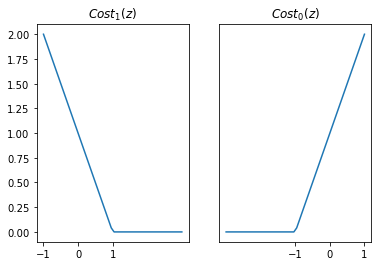

In [23]:
plt.show()

## 支持向量機（2）

- 支持向量機的成本函數：

$$\text{minimize}\frac{1}{2}\sum_{j=1}^{n}\theta_j^2$$
$$\text{s.t. } \theta^Tx \ge 1 \text{ if } y = 1$$
$$\theta^Tx \le -1 \text{ if } y = 0$$

## 支持向量機（3）

- 支持向量機的成本函數：
- 我們可以將 $\theta^Tx$ 寫成 $p\|\theta\|$，其中 $\|\theta\|$ 是長度 $\sqrt{\theta_1^2 + \theta_2^2 + \dots}$，而 $p$ 是 $x$ 在 $\theta$ 的投影
- 成本函數

$$\text{minimize}\frac{1}{2}\sum_{j=1}^{n}\theta_j^2$$
$$\text{s.t. } p \| \theta \| \ge 1 \text{ if } y = 1$$
$$p \| \theta \| \le -1 \text{ if } y = 0$$

## 支持向量機（4）

![](https://qph.ec.quoracdn.net/main-qimg-56a04b0f1969a8bee7264a9162e39d0b)

Source: [Quora](https://www.quora.com/)

## 支持向量機（5）

- 為什麼支持向量機會選 A 而不是 B？
    - B 的 $p$ 小，所以 $\|\theta\|$ 較大
    - A 的 $p$ 大，所以 $\|\theta\|$ 較小

## 支持向量機（6）

- 支持向量機使用最大邊界來處理線性可分資料
- 支持向量機使用核函數（rbf）計算相似度來處理線性不可分資料

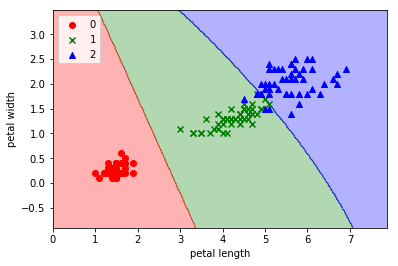

In [24]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 0.2) # gamma = 0.2, 核函數 rbf
iris = datasets.load_iris()
X = iris.data[:, 2:] # 花瓣長度與花瓣寬度
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 0.2) # gamma = 0.2, 核函數 rbf
svm.fit(X_train, y_train)
plot_decision_region(X = X, y = y, classifier = svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.show()

## 支持向量機（7）

- 分類演算法的評估指標：[混淆矩陣（Confusion Matrix）](https://en.wikipedia.org/wiki/Confusion_matrix)

|   |陽性|陰性|
|---|---|----|
|陽性|5|8|
|陰性|6|7|

- $\text{準確率（Accuracy）}= \frac{5 + 7}{5 + 6 + 7 + 8} = 0.52$
- $\text{錯誤率（Error）} = 1 - \text{Accuracy} = 1 - 0.5 = 0.48$

In [25]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


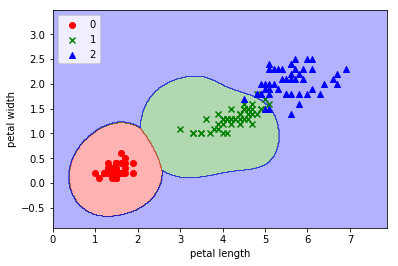

In [26]:
# 調整 gamma
svm = SVC(kernel = 'rbf', gamma = 2) # gamma = 2
svm.fit(X_train, y_train)

plot_decision_region(X = X, y = y, classifier = svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.show()

In [27]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


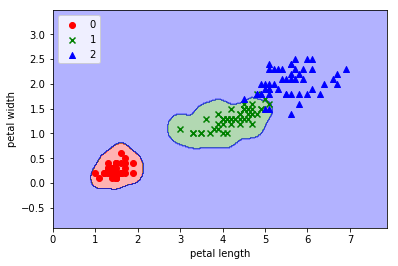

In [28]:
# 調整 gamma
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 20) # gamma = 20
svm.fit(X_train, y_train)

plot_decision_region(X = X, y = y, classifier = svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.96


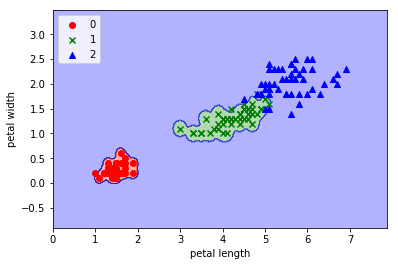

In [30]:
# 調整 gamma
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 100) # gamma = 100
svm.fit(X_train, y_train)

plot_decision_region(X = X, y = y, classifier = svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.show()

In [31]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


## 支持向量機（8）

- 調高 `gamma` 參數的過程，其實就是一個對訓練資料配適（fitting）的過程
- 過高的 `gamma` 參數可以讓訓練資料完美的分類，但對測試資料的預測反而下滑

## 決策樹

- 好解釋的分類器
- 用不同的門檻值切分變數
- 以**最大化**資訊增益值為目標

$$IG(D_p) = I(D_p) - \frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})$$

## 決策樹（2）

- 資訊值有三種計算方式：
    - 錯誤率（Error）
    - 吉尼指標（Gini Index）
    - 熵（Entropy）（\*）

## 決策樹（3）

- 這三個計算方式都跟**錯誤率（Error）**計算有關

## 決策樹（4）

|計算方式|資訊值公式|
|-------|--------|
|錯誤率|$1 - \text{accuracy}$|
|吉尼指標|$1 - \text{accuracy}^2 - \text{error}^2$|
|熵|$-(\text{accuracy}\log_2(\text{accuracy}) + \text{error}\log_2(\text{error}))$|

## 決策樹（5）

![Decision Tree Metrics](https://storage.googleapis.com/py_ml_images/tree_metrics.png)

## 決策樹（6）

- 先計算各個節點的資訊值
- A 情況：

|計算方式|$I(D_p)$|$I(D_{left})$|$I(D_{right})$|
|-------|-----------|---------------|----------------|
|錯誤率|$40/80 = 0.5$|$10/40 = 0.25$|$10/40 = 0.25$|
|吉尼指標|$1-0.5^2-0.5^2 = 0.5$|$1-0.75^2-0.25^2 = 0.375$|$1-0.75^2-0.25^2 = 0.375$|
|熵|$-(0.5log_2(0.5)+0.5log_2(0.5)) = 1$|$-(0.75log_2(0.75)+0.25log_2(0.25)) = 0.81$|$-(0.75log_2(0.75)+0.25log_2(0.25)) = 0.81$|

## 決策樹（7）

- 先計算各個節點的資訊值
- B 情況：

|計算方式|$I(D_p)$|$I(D_{left})$|$I(D_{right})$|
|-------|-----------|---------------|----------------|
|錯誤率|$40/80 = 0.5$|$20/60 = 1/3$|$0/20 = 0$|
|吉尼指標|$1-0.5^2-0.5^2 = 0.5$|$1-(2/3)^2-(1/3)^2 = 1/3$|$1-1^2-0^2 = 0$|
|熵|$-(0.5log_2(0.5)+0.5log_2(0.5)) = 1$|$-(2/3log_2(2/3)+(1/3)log_2(1/3)) = 0.92$|$-(1log_2(1)+0log_2(0)) = 0$|

## 決策樹（8）

- 最後計算**資訊增益值**：

|計算方式|情況 A|情況 B|
|-------|-----|------|
|錯誤率|$0.5-\frac{40}{80}\times0.25-\frac{40}{80}\times0.25 = 0.25$|$0.5-\frac{6}{8}\times\frac{1}{3}-0=0.25$|
|吉尼指標|$0.5-\frac{4}{8}\times0.375-\frac{4}{8}\times0.375=0.125$|$1-\frac{6}{8}\times0.\bar{4}-0=0.1\bar{6}$|
|熵|$0.5-\frac{4}{8}\times0.81-\frac{4}{8}\times0.81=0.125$|$1-\frac{6}{8}\times0.92-0=0.31$|

- 實務使用熵（Entropy）居多

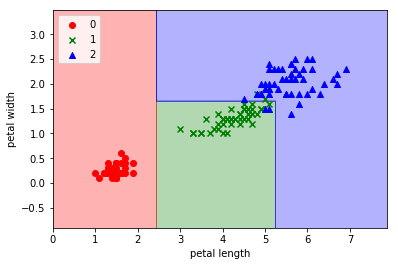

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
tree.fit(X_train, y_train)
plot_decision_region(X = X, y = y, classifier = tree)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.show()

In [33]:
from sklearn.metrics import accuracy_score

y_pred = tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.96


## 決策樹（9）

- 假如想要畫出分支圖，需要另外安裝[GraphViz](http://www.graphviz.org/)

![GraphViz Decision Tree](https://storage.googleapis.com/py_ml_images/tree_graphviz.png)

## K 最近鄰

![knn](https://storage.googleapis.com/py_ml_images/knn.png)

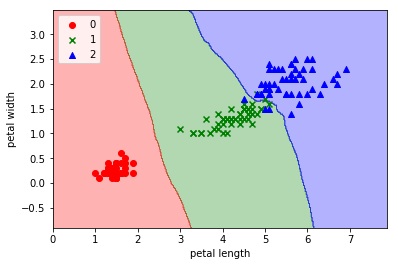

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
plot_decision_region(X = X, y = y, classifier = knn) # 換分類器
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.show()

In [35]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.96
